<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here

# Check for missing data in critical columns
missing_data = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print(missing_data)

# Fill missing JobSat with the median of the column
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].median())

# For Employment and RemoteWork, drop rows with missing values (if the data is critical)
df.dropna(subset=['Employment', 'RemoteWork'], inplace=True)


Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
# Check unique values in 'YearsCodePro'
unique_values = df['YearsCodePro'].unique()
print(unique_values)


[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '16' '8' '14' '4' '45' '1' '24' '2' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '31' '19' '21' '28' '34' '32' '22' '40' '50' '39'
 '44' '41' '36' '38' 'More than 50 years' '43' '42' '48' '46' '49' '47']


In [5]:
# Manually replace known non-numeric entries with NaN
df['YearsCodePro'] = df['YearsCodePro'].replace(['Unknown', 'NaN', 'Not Available', 'nan', 'None'], pd.NA)

# Convert to numeric (will turn non-numeric entries to NaN)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')


In [6]:
# Drop rows where 'YearsCodePro' is NaN
df.dropna(subset=['YearsCodePro'], inplace=True)


In [7]:
# Fill NaN values with the median of the column
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())



ExperienceRange
0-5      7.0
5-10     7.0
10-20    7.0
>20      7.0
Name: JobSat, dtype: float64


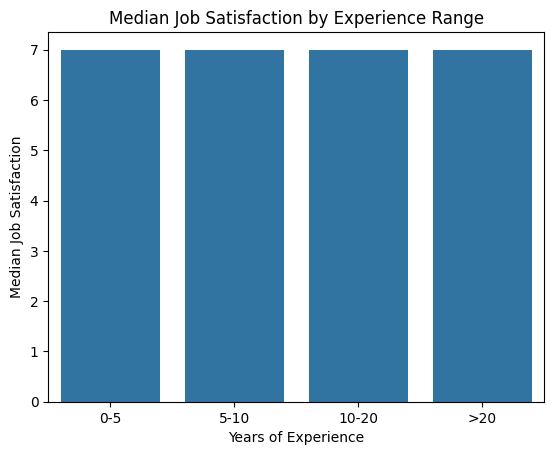

In [8]:
## Write your code here

# Create experience ranges
bins = [0, 5, 10, 20, float('inf')]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels)

# Calculate median job satisfaction for each experience range
# Group by 'ExperienceRange' and calculate median job satisfaction, keeping only observed categories
median_satisfaction = df.groupby('ExperienceRange', observed=False)['JobSat'].median()

print(median_satisfaction)

# Visualize the relationship using a bar plot
sns.barplot(x=median_satisfaction.index, y=median_satisfaction.values)
plt.title('Median Job Satisfaction by Experience Range')
plt.xlabel('Years of Experience')
plt.ylabel('Median Job Satisfaction')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


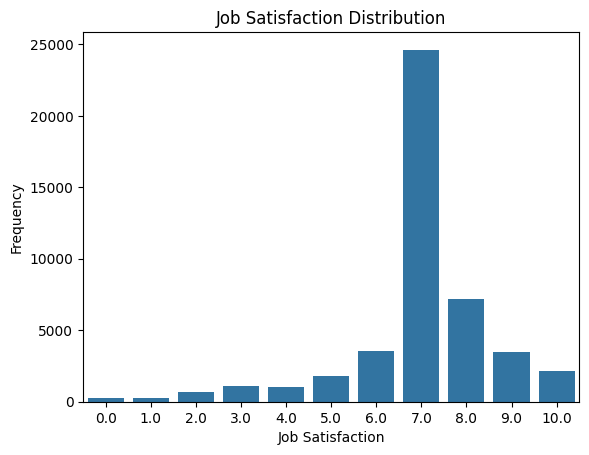

In [9]:
## Write your code here

# Count plot of JobSat values
sns.countplot(x='JobSat', data=df)
plt.title('Job Satisfaction Distribution')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


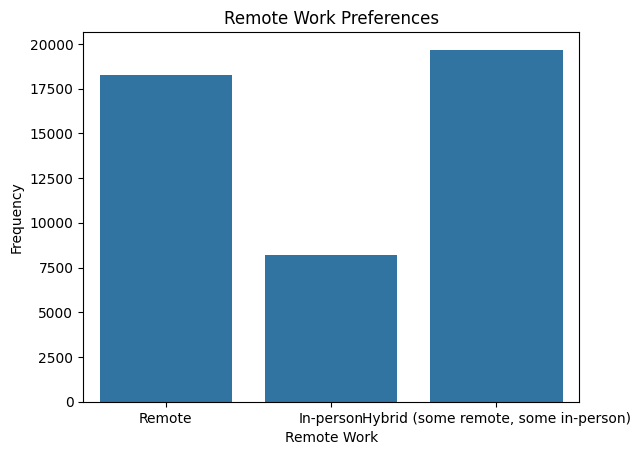

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                15172   
Employed, full-time;Employed, part-time                                               72   
Employed, full-time;Independent contractor, fre...                                  1175   
Employed, full-time;Independent contractor, fre...                                    67   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Not employed, but looking fo...                                     0   
Student, full-time;Not employed, but looking fo...                                     1   
Student, full-time;Not employed, but looking fo...                              

In [10]:
## Write your code here

abs# Count plot of remote work distribution
sns.countplot(x='RemoteWork', data=df)
plt.title('Remote Work Preferences')
plt.xlabel('Remote Work')
plt.ylabel('Frequency')
plt.show()

# Cross-tabulation of remote work preferences by employment type and job role
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print(remote_by_employment)


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


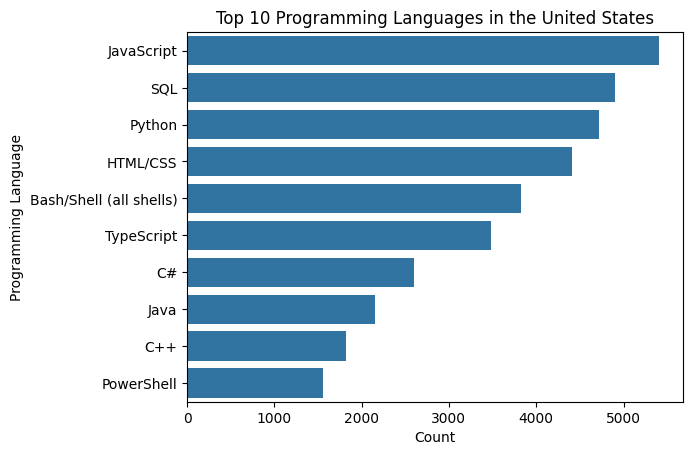

In [11]:
## Write your code here

# Normalize country names to 'United States' if needed
df['Country'] = df['Country'].replace({
    'United States of America': 'United States',
    'USA': 'United States',
    # Add any other variations here
}, regex=True)

# Filter dataset by United States
df_us = df[df['Country'] == 'United States']

# Check if there is data for the United States
if df_us.shape[0] == 0:
    print("No data for the United States.")
else:
    # Split the 'LanguageHaveWorkedWith' column by ';' and count language occurrences
    languages = df_us['LanguageHaveWorkedWith'].str.split(';', expand=True).stack().value_counts()

    # Show the top 10 programming languages
    top_languages = languages.head(10)

    # Plot the top 10 programming languages used in the United States
    sns.barplot(x=top_languages.values, y=top_languages.index)
    plt.title('Top 10 Programming Languages in the United States')
    plt.xlabel('Count')
    plt.ylabel('Programming Language')
    plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


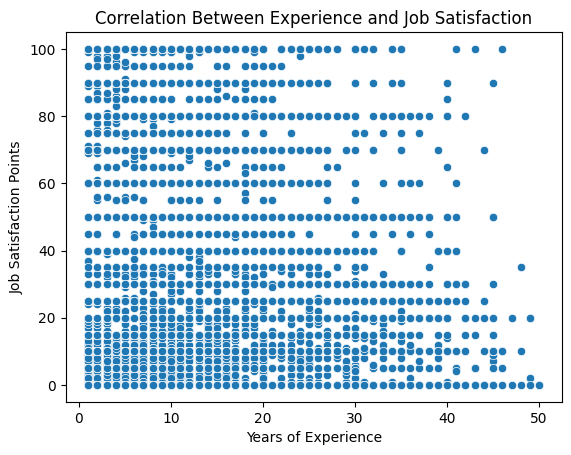

In [12]:
## Write your code here

# Scatter plot between YearsCodePro and JobSatPoints_1
sns.scatterplot(x='YearsCodePro', y='JobSatPoints_1', data=df)
plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Experience')
plt.ylabel('Job Satisfaction Points')
plt.show()


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [13]:
## Write your code here

# Cross-tabulation of educational background and employment type
edu_vs_employment = pd.crosstab(df['EdLevel'], df['Employment'])
print(edu_vs_employment)


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 974   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      15663   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   10256   
Primary/elementary school                                           133   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1924   
Secondary school (e.g. American high school, Ge...                 1281   
Some college/university study without earning a...                 3286   
Something else                                                      318   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

### Heatmap

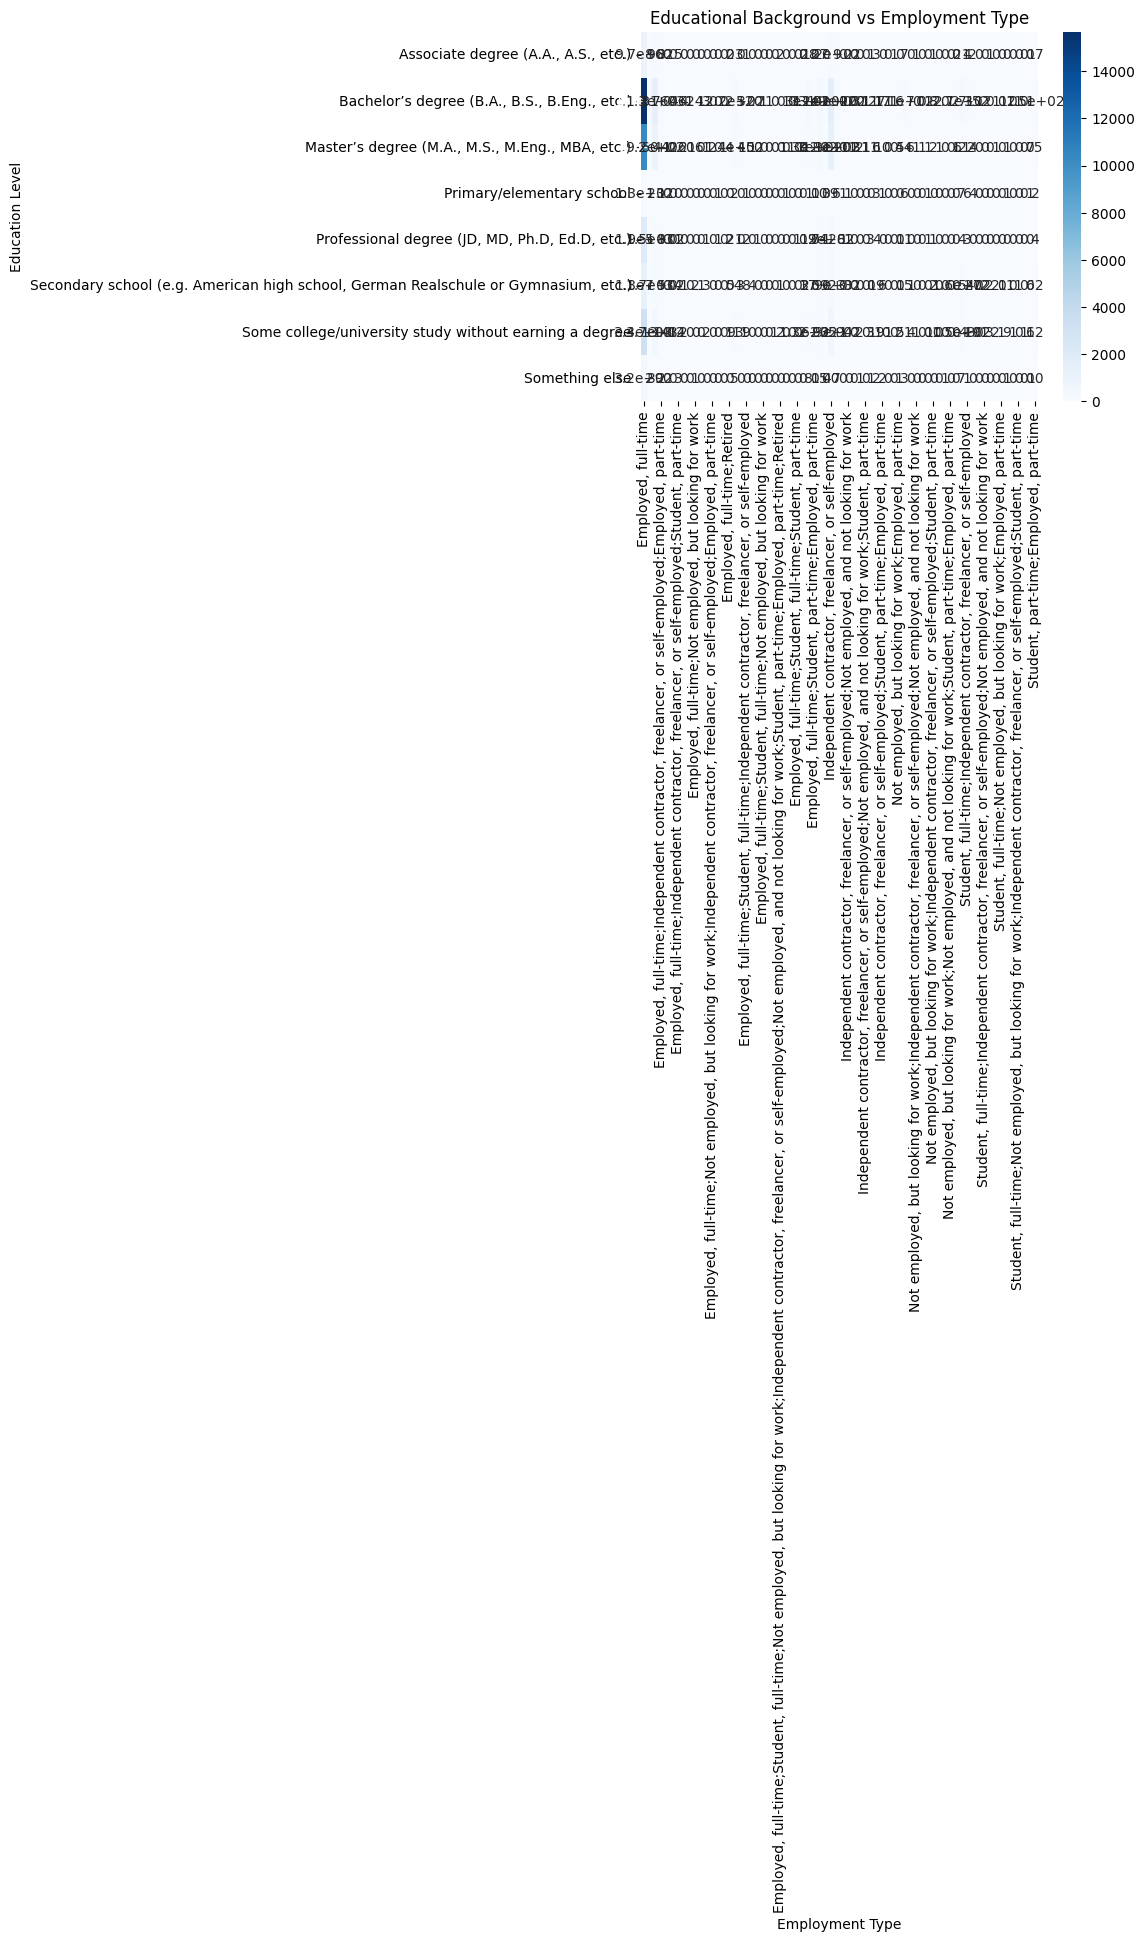

In [14]:
# Visualize the relationship using a heatmap
sns.heatmap(edu_vs_employment, annot=True, cmap='Blues')
plt.title('Educational Background vs Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [15]:
## Write your code here

# Save the cleaned dataset
df.to_csv('cleaned_survey_data.csv', index=False)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


## Author

Willie Conway

Copyright © IBM Corporation. All rights reserved.
